# Análisis de radiación en venteo
### TEPF Centralizada Narambuena

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

# Datos de la antorcha
h=12      # [m] altura 
d=100     # [mm] diametro tip
Qs=150000/(24*60*60) # [sm3/s] Caudal de venteo
NHV=52260  # [kJ/Kg] calor neto 
Vw=33    # [m/s] tomo 120 km/h
MW=21.48   # Peso Molecular
T=30+273   # [°K] 
R=8.314    # J/mol·K Constante universar de los gases
Z=0.9962   # coeficiente de compresibilidad en condición de venteo
epsilon=0.3 # fracción del calor producido en forma de radiación (segun ED)



### Cáclulo de la longitud de llama según GPSA

$ L_{f}= (0.12) d\sqrt{\frac{\Delta P_{w}}{1400}} $

$\Delta P_{w}=\frac{\rho V^{2}}{19.62} $

$V=\frac{P_{s}.T_{o}.Z_{o}.Q_{s}}{P_{o}T_{s}Z_{s}.\pi.(\frac{d}{2000})^{2}}\approx \frac{Q_{s}}{\pi.(\frac{d}{2000})^{2}}$

$\rho= \frac{P. MW}{R.Z.T}$ , Asumo P=101 Kpa


In [2]:
V=Qs/(3.14*(d/2000)**2)
rho=(101*MW)/(R*Z*T)
dPw=(rho*V**2)/19.62
Lf=0.12*d*(dPw/1400)**0.5
print("largo estimado de la Llama ",Lf)

largo estimado de la Llama  14.888598514012632


<img src="flare.jpg" style="width:50;height:50">

Angulo de inclinación de la llama

$\theta=tan^{-1} \frac{Vw}{Vex}$

$Vex=168.\sqrt{\frac{\Delta Pw}{1400}}$

In [3]:
Vex=168*(dPw/1400)
theta=math.atan(Vw/Vex)

In [4]:
print("Ángulo de la llama "+str(round(math.degrees(theta),1))+"°")


Ángulo de la llama 7.3°


In [5]:
#coordenadas del centro de llama
xc=(Lf/3)*math.sin(theta)
zc=(Lf/3)*math.cos(theta)
zf=h+zc  # altura 
xf=xc    # Desplazamiento de la llama en sentido de x+ (dirección del viento)

## Cálculo de la Radiación

$I=\frac{W_{f}.NHV. \epsilon}{(14.4)\pi(dist^{2})}$

caudal másico de gas Kg/h

$W_{f}=Q_{s}.\rho.3600$ 

In [6]:
wf=Qs*rho*3600
# cálculo de la distancia requerida para radiación objetivo de 
radiacion = 3200 # w/m2 corresponden a un máximo de 4700 total (-solar 1500W)
dist=(wf*NHV*epsilon/(14.4*3.14159*radiacion))**0.5
X_r=(dist**2-zf**2)**0.5+xc

In [7]:
print("Radio Requerido para radiación objetivo [m]",X_r)

Radio Requerido para radiación objetivo [m] 17.91288636970729


In [8]:
LL2=60  # locación /2
x_rango=y_rango=np.linspace(-LL2,LL2,101)
valores=np.zeros((np.shape(x_rango)[0],np.shape(y_rango)[0]))
i=-1
for x_punto in x_rango:
    i=i+1
    j=-1
    for y_punto in y_rango:
        j=j+1
        dis_point=((xf-x_punto)**2+y_punto**2+zf**2)**0.5
        I=wf*NHV*epsilon/(14.4*3.14159*dis_point**2)
        valores[i,j]=I
        

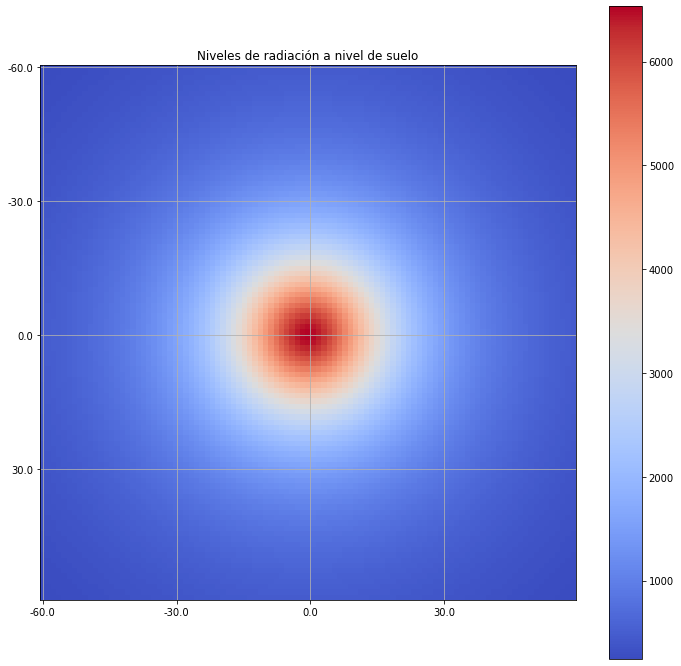

In [10]:
plt.figure(figsize = (12,12))
plt.title("Niveles de radiación a nivel de suelo")
plt.xticks(np.linspace(0,valores.shape[0],5),np.linspace(-LL2,LL2,5));
plt.yticks(np.linspace(0,valores.shape[1],5),np.linspace(-LL2,LL2,5));
plt.imshow(valores,cmap='coolwarm')
plt.colorbar();
plt.grid();

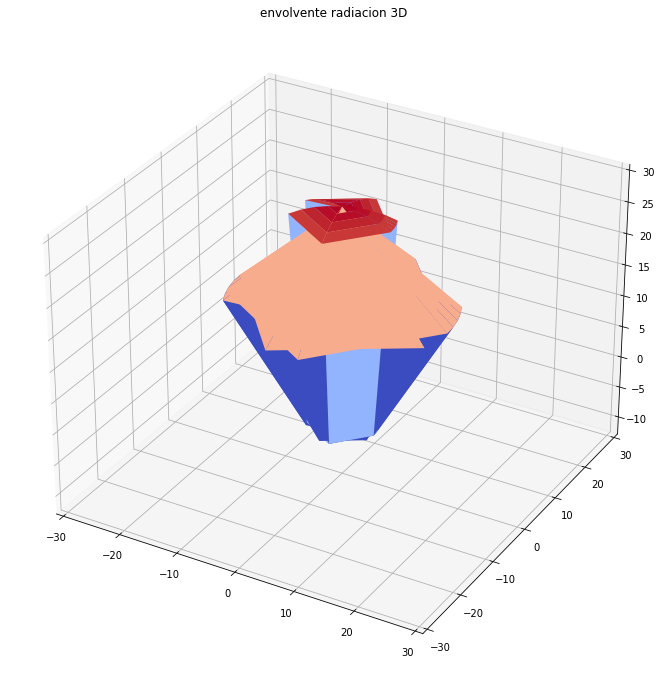

In [13]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
from matplotlib import cm

# Make data
u = np.linspace(0,valores.shape[0],5),np.linspace(-LL2,LL2,5)
v = np.linspace(0,valores.shape[1],5),np.linspace(-LL2,LL2,5)

x = (X_r * np.outer(np.cos(u), np.sin(v)))
y = (X_r * np.outer(np.sin(u), np.sin(v)))
z = h + (X_r * np.outer(np.ones(np.size(u)), np.cos(v)))

# Plot the surface
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_zlim([-h, 30])

ax.plot_surface(x, y, z, cmap=cm.coolwarm,antialiased=True, shade=True)
plt.title("envolvente radiacion 3D")
plt.show()